In [ ]:
import pandas as pd
data = pd.read_csv('/content/exams.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group B,some college,free/reduced,completed,67,63,65
1,male,group A,high school,free/reduced,none,43,44,38
2,male,group E,associate's degree,standard,none,92,80,83
3,female,group C,associate's degree,standard,none,74,70,71
4,female,group D,bachelor's degree,standard,completed,81,89,92


In [ ]:
#Calculates the mean of 'reading score', 'writing score', and 'math score' in the new column 'Overall Score'
data['Overall Score'] = (data['reading score'] + data['writing score'] + data['math score'])/ 3
data['Overall Score'] = data['Overall Score'].astype(int)  #Converts the calculated mean to an integer.
data['Pass/Fail'] = (data['Overall Score'] >= 60).astype(int)  #greater than or equal to 60. If the condition is true, it assigns 1 (Pass), otherwise 0 (Fail)

#Replaces the categorical values with numerical values
data["gender"] = data["gender"].replace({"male": 1, "female": 0})
data["race/ethnicity"] = data["race/ethnicity"].replace({"group A": 1, "group B": 2, "group C": 3, "group D": 4, "group E": 5})
data["parental level of education"] = data["parental level of education"].replace({"some college": 1, "high school": 2, "associate's degree": 3, "bachelor's degree": 4, "some high school": 5, "master's degree": 6})
data["lunch"] = data["lunch"].replace({"free/reduced": 1, "standard": 0})
data["test preparation course"] = data["test preparation course"].replace({"completed": 1, "none": 0})

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall Score,Pass/Fail
0,1,2,1,1,1,67,63,65,65,1
1,1,1,2,1,0,43,44,38,41,0
2,1,5,3,0,0,92,80,83,85,1
3,0,3,3,0,0,74,70,71,71,1
4,0,4,4,0,1,81,89,92,87,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Combine numerical and categorical columns for normalization
all_columns = list(data.columns)

# Exclude Target column that should not be normalized
columns_to_normalize = [col for col in all_columns if col not in ["Pass/Fail"]]

# Use MinMaxScaler for normalization
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall Score,Pass/Fail
0,1.0,0.25,0.0,1.0,1.0,0.602410,0.525641,0.5625,0.527027,1
1,1.0,0.00,0.2,1.0,0.0,0.313253,0.282051,0.2250,0.202703,0
2,1.0,1.00,0.4,0.0,0.0,0.903614,0.743590,0.7875,0.797297,1
3,0.0,0.50,0.4,0.0,0.0,0.686747,0.615385,0.6375,0.608108,1
4,0.0,0.75,0.6,0.0,1.0,0.771084,0.858974,0.9000,0.824324,1


In [ ]:
#Summary of statistics for each numerical column
data.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall Score,Pass/Fail
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.51000,0.542750,0.432400,0.329000,0.343000,0.593651,0.602128,0.598138,0.559054,0.713000
std,0.50015,0.286036,0.317129,0.470085,0.474949,0.184006,0.190215,0.191015,0.194820,0.452588
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.250000,0.200000,0.000000,0.000000,0.469880,0.474359,0.475000,0.432432,0.000000
50%,1.00000,0.500000,0.400000,0.000000,0.000000,0.590361,0.602564,0.600000,0.554054,1.000000
75%,1.00000,0.750000,0.800000,1.000000,1.000000,0.722892,0.743590,0.737500,0.702703,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


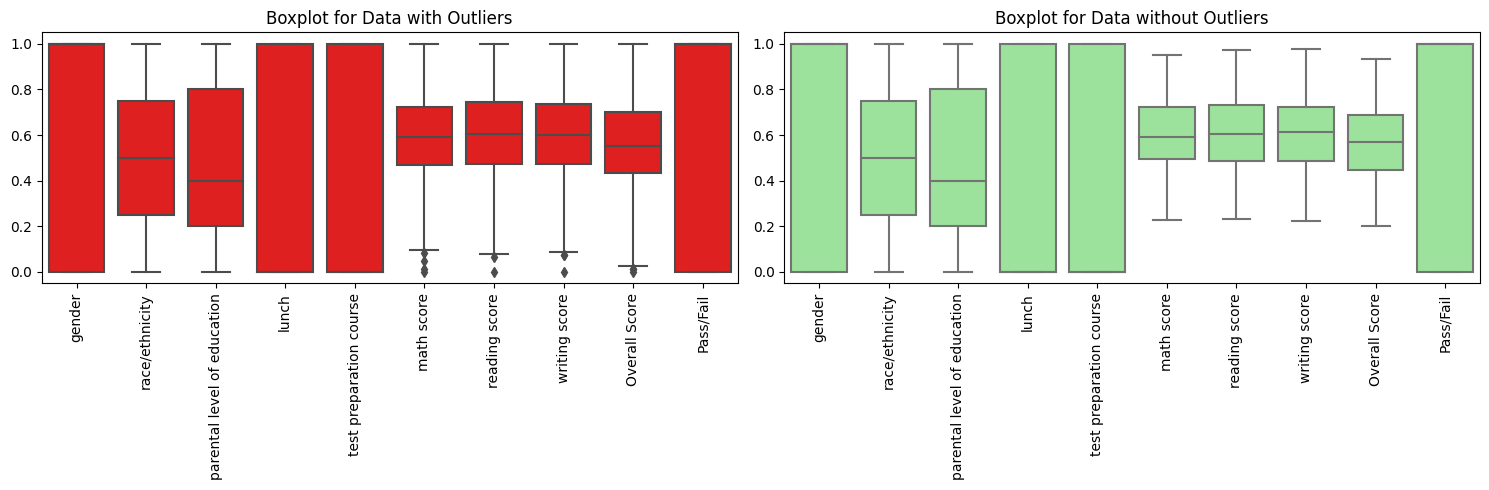

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Plot boxplot for data with outliers
plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data=data, color='red')
ax1.set_title('Boxplot for Data with Outliers')

import numpy as np
from scipy import stats

# Example using Z-score to remove outliers
z_scores = stats.zscore(data)
abs_z_scores = np.abs(z_scores)
data_no_outliers = data[(abs_z_scores <2).all(axis=1)]

# Plot boxplot for data without outliers
ax2 = plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers, color='lightgreen')
ax2.set_title('Boxplot for Data without Outliers')

# Rotate x-axis labels vertically
for ax in [ax1, ax2]:
    ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')

plt.tight_layout()
plt.show()

In [ ]:
print("Original Data Shape:", data.shape)
print("Data Shape After Removing Outliers:", data_no_outliers.shape)

Original Data Shape: (1000, 10)
Data Shape After Removing Outliers: (909, 10)


Target before oversampling:
1    674
0    235
Name: Pass/Fail, dtype: int64

Target after oversampling:
0    473
1    473
Name: Pass/Fail, dtype: int64


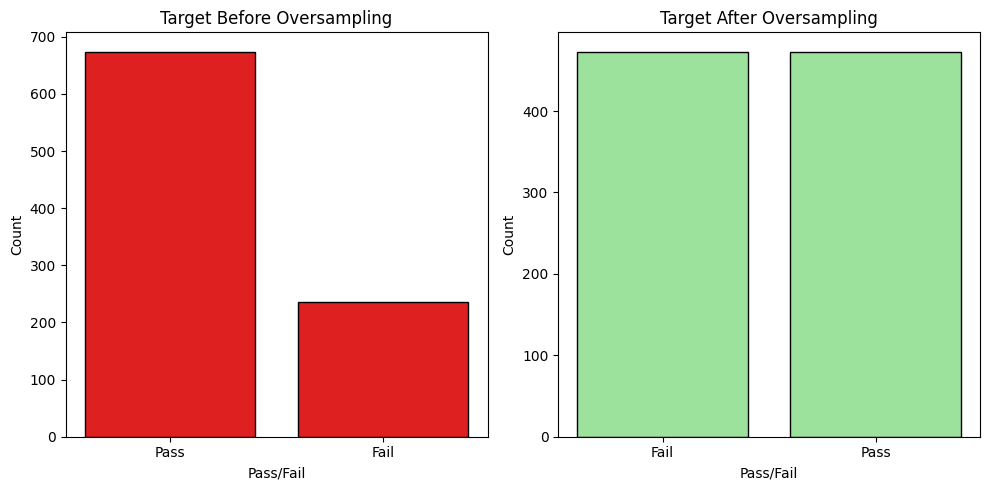

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt

# Check the Target before oversampling
print("Target before oversampling:")
print(data_no_outliers['Pass/Fail'].value_counts())

# Assuming data is your DataFrame
# X should be the features, and y should be the target variable
X = data_no_outliers.drop('Pass/Fail', axis=1)  # Use data_no_outliers instead of data
y = data_no_outliers['Pass/Fail']  # Use data_no_outliers instead of data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Specify the desired sampling strategy for RandomOverSampler (1:1 ratio)
sampling_strategy = 1.0
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check the Target after oversampling
print("\nTarget after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# Plot bar charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Bar chart before oversampling
axes[0].bar(data_no_outliers['Pass/Fail'].value_counts().index.map({1: 'Pass', 0: 'Fail'}),
            data_no_outliers['Pass/Fail'].value_counts().values, color='#df2020', edgecolor='black')
axes[0].set_title('Target Before Oversampling')
axes[0].set_xlabel('Pass/Fail')
axes[0].set_ylabel('Count')

# Bar chart after oversampling
axes[1].bar(pd.Series(y_train_resampled).value_counts().index.map({1: 'Pass', 0: 'Fail'}),
            pd.Series(y_train_resampled).value_counts().values, color='#9ce29c', edgecolor='black')
axes[1].set_title('Target After Oversampling')
axes[1].set_xlabel('Pass/Fail')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
#Summary after remove outlier
data_no_outliers.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Overall Score,Pass/Fail
count,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,0.517052,0.540429,0.424202,0.323432,0.342134,0.600130,0.608488,0.604015,0.565798,0.741474
std,0.499984,0.283449,0.314740,0.468044,0.474685,0.154520,0.162047,0.161591,0.161905,0.438065
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.228916,0.230769,0.225000,0.202703,0.000000
25%,0.000000,0.250000,0.200000,0.000000,0.000000,0.493976,0.487179,0.487500,0.445946,0.000000
50%,1.000000,0.500000,0.400000,0.000000,0.000000,0.590361,0.602564,0.612500,0.567568,1.000000
75%,1.000000,0.750000,0.800000,1.000000,1.000000,0.722892,0.730769,0.725000,0.689189,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.951807,0.974359,0.975000,0.932432,1.000000


In [ ]:
#For me , dataset after all preprocessing steps
data_no_outliers.to_csv('data_no_outliers.csv', index=False)